In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from scipy import integrate

In [2]:
def U0(x,L):
    '''
    Se define el potencial eléctrico que existe en el borde de la placa
    
    Parámetros de la función
    ------------------------
    x: posición a lo largo del borde
    
    Salida de la función
    ------------------------
    valorU0: valor del potencial eléctrico en la posición x
    '''
    valorU0 = (25+75*x/L)
    return valorU0

In [3]:
def CálculoEm(x,L,m):
    '''
    Calcula los coeficientes de peso para la estimación del potencial de una placa cuadrada
    
    Parámetros de la función:
    -------------------------
    x: arreglo de valores unidimencinal que define el eje x
    L: entero
    m: entero, que define el término
    
    Salida de la función:
    -------------------------
    em: coeficiente del término
    '''
    f = U0(x,L)*np.sin(m*np.pi*x/L)
    em = np.trapz(f,x)/np.sinh(m*np.pi)
    return em

In [4]:
def UXY(x,y,L,nt):
    '''
    Función que estima el valor del potencial en una placa cuadrada para un potencial que es función de X
    
    Parámetros de entrada:
    ----------------------
    y: arreglo que define las posiciones del eje x.
    y: arreglo que define las posiciones del eje y.
    
    Salida de la función:
    ---------------------
    UYapprox: Estimación del potencial
    '''
    UXYapprox = 0
    for n in range(1,nt):
        UXYapprox += CálculoEm(X,L,n)*np.sin(n*np.pi*X/L)*np.sinh(n*np.pi*Y/L)
    return UXYapprox

In [5]:
# Se definen los parámetros de trabajo
L = 1
nTérminos = 100
pMalla = 30
x = np.linspace(0,L,pMalla)
y = np.linspace(0,L,pMalla)
X,Y = np.meshgrid(x,y)
Z = UXY(X,Y,L,nTérminos)

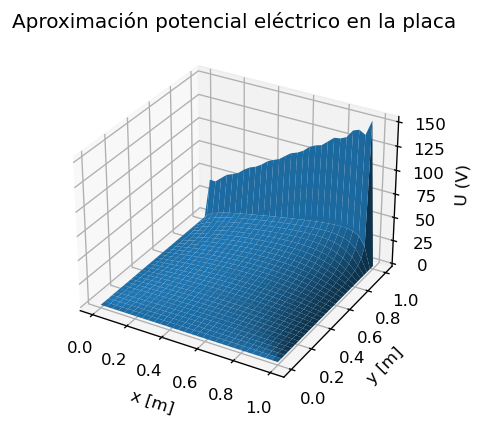

In [6]:
# Se grafican los resultados
fig = plt.figure(dpi = 120)
ax = plt.axes(projection='3d')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('U (V)')
ax.plot_surface(X,Y,Z)
ax.set_title('Aproximación potencial eléctrico en la placa')
plt.show()